In [64]:
#import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter


import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk


import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk


import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')



nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sabihakhairohi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sabihakhairohi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sabihakhairohi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sabihakhairohi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [65]:
# Specify the path to your CSV file
file_path = 'data/spam.csv'
# Load the dataset
df = pd.read_csv(file_path, encoding='latin-1')

# Display first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check column names and info
print("\nColumn Names:", df.columns.tolist())
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (5572, 5)

First 5 rows:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Column Names: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 

Unique labels: ['ham' 'spam']

Class Distribution:
label
0    4825
1     747
Name: count, dtype: int64

Spam Percentage: 13.41%


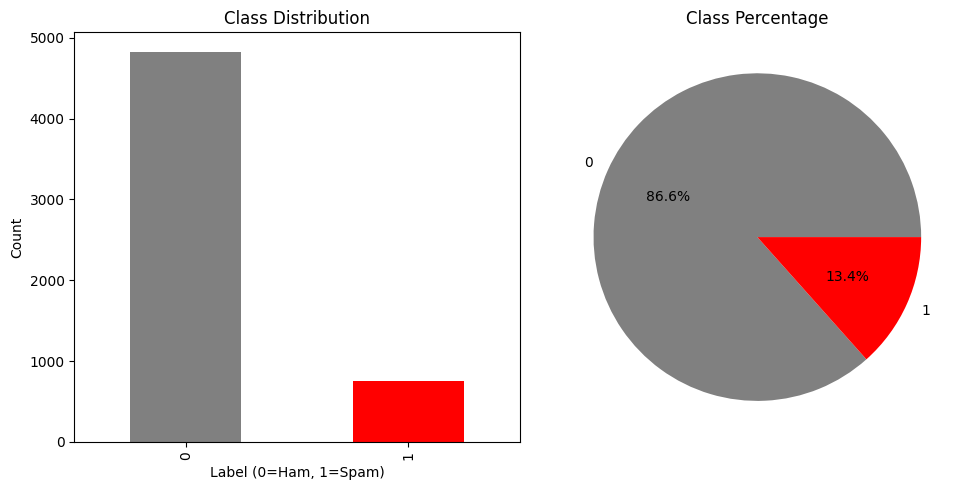

In [66]:
#cleaning and preprocessing text data
# Drop unnecessary columns (we only need v1 and v2)
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'message']
print("Unique labels:", df['label'].unique())
df.head()


df['label'] = df['label'].map({'spam': 1, 'ham': 0}) #binary encoding

#distribution graphs
print("\nClass Distribution:")
print(df['label'].value_counts())
print(f"\nSpam Percentage: {df['label'].mean():.2%}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['gray', 'red'])
plt.title('Class Distribution')
plt.xlabel('Label (0=Ham, 1=Spam)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gray', 'red'])
plt.title('Class Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [67]:
import nltk
nltk.download('punkt_tab')

def clean_text(text):
   # Clean and preprocess text data
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def tokenize_and_remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

def preprocess_text(text, use_lemmatization=True):
    # Clean text
    cleaned_text = clean_text(text)

    # Tokenize and remove stopwords
    tokens = tokenize_and_remove_stopwords(cleaned_text)

    # Lemmatize or stem
    if use_lemmatization:
        processed_tokens = lemmatize_tokens(tokens)
    else:
        stemmer = PorterStemmer()
        processed_tokens = [stemmer.stem(token) for token in tokens]

    # Join back to string
    return ' '.join(processed_tokens)

# Apply preprocessing to all messages
print("Processing text data...")
df['processed_message'] = df['message'].apply(preprocess_text)

# Show before and after
print("\nOriginal vs Processed Text:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original: {df['message'].iloc[i][:100]}...")
    print(f"Processed: {df['processed_message'].iloc[i][:100]}...")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sabihakhairohi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Processing text data...

Original vs Processed Text:

Example 1:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a...
Processed: go jurong point crazy available bugis n great world la e buffet cine got amore wat...

Example 2:
Original: Ok lar... Joking wif u oni......
Processed: ok lar joking wif u oni...

Example 3:
Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr...
Processed: free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs appl...


In [68]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

# Initialize BPE tokenizer
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()

# Configure trainer
trainer = BpeTrainer(
    vocab_size=5000,  # Target vocabulary size
    special_tokens=["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"],
    min_frequency=2
)

# Prepare training data
training_data = df['processed_message'].tolist()

# Train BPE tokenizer
print("Training BPE tokenizer...")
tokenizer.train_from_iterator(training_data, trainer=trainer)

# Save tokenizer
tokenizer.save("bpe_tokenizer.json")
print("✅ BPE tokenizer trained and saved!")

# Test tokenization on sample texts
print("\n🔍 Sample BPE Tokenization:")
for i in range(3):
    sample_text = df['processed_message'].iloc[i]
    output = tokenizer.encode(sample_text)
    print(f"\nExample {i+1}:")
    print(f"Original: {sample_text[:80]}...")
    print(f"Tokens: {output.tokens[:15]}")
    print(f"Token IDs: {output.ids[:15]}")
    print(f"Token count: {len(output.tokens)}")

# Apply BPE tokenization to all messages
print("\n\nTokenizing all messages with BPE...")
df['bpe_tokens'] = df['processed_message'].apply(lambda x: tokenizer.encode(x).tokens)
df['bpe_token_ids'] = df['processed_message'].apply(lambda x: tokenizer.encode(x).ids)

print(f"✅ BPE tokenization complete!")

Training BPE tokenizer...



✅ BPE tokenizer trained and saved!

🔍 Sample BPE Tokenization:

Example 1:
Original: go jurong point crazy available bugis n great world la e buffet cine got amore w...
Tokens: ['go', 'j', 'ur', 'ong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buff', 'et']
Token IDs: [67, 15, 86, 329, 780, 1313, 1226, 2389, 19, 314, 682, 98, 10, 2525, 70]
Token count: 20

Example 2:
Original: ok lar joking wif u oni...
Tokens: ['ok', 'lar', 'joking', 'wif', 'u', 'oni']
Token IDs: [95, 546, 2423, 881, 26, 2214]
Token count: 6

Example 3:
Original: free entry wkly comp win fa cup final tkts st may text fa receive entry question...
Tokens: ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry']
Token IDs: [146, 854, 1432, 347, 307, 242, 1785, 1167, 3044, 55, 354, 177, 242, 695, 854]
Token count: 23


Tokenizing all messages with BPE...
✅ BPE tokenization complete!


In [69]:
from collections import Counter

def compute_token_statistics(df, token_column, label=''):
    """
    Compute comprehensive token statistics
    """
    # Flatten all tokens
    all_tokens = []
    doc_lengths = []

    for tokens in df[token_column]:
        all_tokens.extend(tokens)
        doc_lengths.append(len(tokens))

    # Count token frequencies
    token_freq = Counter(all_tokens)

    # Compute statistics
    stats = {
        'vocabulary_size': len(token_freq),
        'total_tokens': len(all_tokens),
        'unique_tokens': len(set(all_tokens)),
        'avg_doc_length': np.mean(doc_lengths),
        'median_doc_length': np.median(doc_lengths),
        'min_doc_length': np.min(doc_lengths),
        'max_doc_length': np.max(doc_lengths),
        'std_doc_length': np.std(doc_lengths),
        'most_common_tokens': token_freq.most_common(20),
        'doc_lengths': doc_lengths
    }

    return stats, token_freq

# Compute statistics for word-level tokens (from preprocessing)
word_tokens = df['processed_message'].apply(lambda x: x.split())
df['word_tokens'] = word_tokens

print("="*60)
print("📊 WORD-LEVEL TOKENIZATION STATISTICS")
print("="*60)
word_stats, word_freq = compute_token_statistics(df, 'word_tokens', 'Word-level')

print(f"\n🔤 Vocabulary Size: {word_stats['vocabulary_size']:,}")
print(f"📝 Total Tokens: {word_stats['total_tokens']:,}")
print(f"🔢 Unique Tokens: {word_stats['unique_tokens']:,}")
print(f"📊 Average Document Length: {word_stats['avg_doc_length']:.2f} tokens")
print(f"📊 Median Document Length: {word_stats['median_doc_length']:.2f} tokens")
print(f"📊 Min Document Length: {word_stats['min_doc_length']} tokens")
print(f"📊 Max Document Length: {word_stats['max_doc_length']} tokens")
print(f"📊 Std Dev Document Length: {word_stats['std_doc_length']:.2f} tokens")

print(f"\n🏆 Top 20 Most Frequent Tokens:")
for i, (token, count) in enumerate(word_stats['most_common_tokens'], 1):
    print(f"  {i:2d}. '{token}': {count:,} times ({count/word_stats['total_tokens']*100:.2f}%)")

# Compute statistics for BPE tokens
print("\n\n" + "="*60)
print("📊 BPE TOKENIZATION STATISTICS")
print("="*60)
bpe_stats, bpe_freq = compute_token_statistics(df, 'bpe_tokens', 'BPE')

print(f"\n🔤 Vocabulary Size: {bpe_stats['vocabulary_size']:,}")
print(f"📝 Total Tokens: {bpe_stats['total_tokens']:,}")
print(f"🔢 Unique Tokens: {bpe_stats['unique_tokens']:,}")
print(f"📊 Average Document Length: {bpe_stats['avg_doc_length']:.2f} tokens")
print(f"📊 Median Document Length: {bpe_stats['median_doc_length']:.2f} tokens")
print(f"📊 Min Document Length: {bpe_stats['min_doc_length']} tokens")
print(f"📊 Max Document Length: {bpe_stats['max_doc_length']} tokens")
print(f"📊 Std Dev Document Length: {bpe_stats['std_doc_length']:.2f} tokens")

print(f"\n🏆 Top 20 Most Frequent BPE Tokens:")
for i, (token, count) in enumerate(bpe_stats['most_common_tokens'], 1):
    print(f"  {i:2d}. '{token}': {count:,} times ({count/bpe_stats['total_tokens']*100:.2f}%)")

# Comparison
print("\n\n" + "="*60)
print("⚖️  WORD vs BPE COMPARISON")
print("="*60)
print(f"Vocabulary Reduction: {(1 - bpe_stats['vocabulary_size']/word_stats['vocabulary_size'])*100:.2f}%")
print(f"Average Length Increase: {((bpe_stats['avg_doc_length']/word_stats['avg_doc_length'])-1)*100:.2f}%")

📊 WORD-LEVEL TOKENIZATION STATISTICS

🔤 Vocabulary Size: 7,878
📝 Total Tokens: 49,901
🔢 Unique Tokens: 7,878
📊 Average Document Length: 8.96 tokens
📊 Median Document Length: 7.00 tokens
📊 Min Document Length: 0 tokens
📊 Max Document Length: 80 tokens
📊 Std Dev Document Length: 6.48 tokens

🏆 Top 20 Most Frequent Tokens:
   1. 'u': 1,206 times (2.42%)
   2. 'call': 602 times (1.21%)
   3. 'im': 464 times (0.93%)
   4. 'get': 401 times (0.80%)
   5. 'ur': 384 times (0.77%)
   6. 'go': 308 times (0.62%)
   7. 'dont': 279 times (0.56%)
   8. 'free': 278 times (0.56%)
   9. 'ok': 277 times (0.56%)
  10. 'ltgt': 276 times (0.55%)
  11. 'å': 274 times (0.55%)
  12. 'know': 267 times (0.54%)
  13. 'day': 255 times (0.51%)
  14. 'got': 251 times (0.50%)
  15. 'come': 247 times (0.49%)
  16. 'like': 245 times (0.49%)
  17. 'ill': 237 times (0.47%)
  18. 'good': 235 times (0.47%)
  19. 'time': 233 times (0.47%)
  20. 'text': 215 times (0.43%)


📊 BPE TOKENIZATION STATISTICS

🔤 Vocabulary Size: 4,

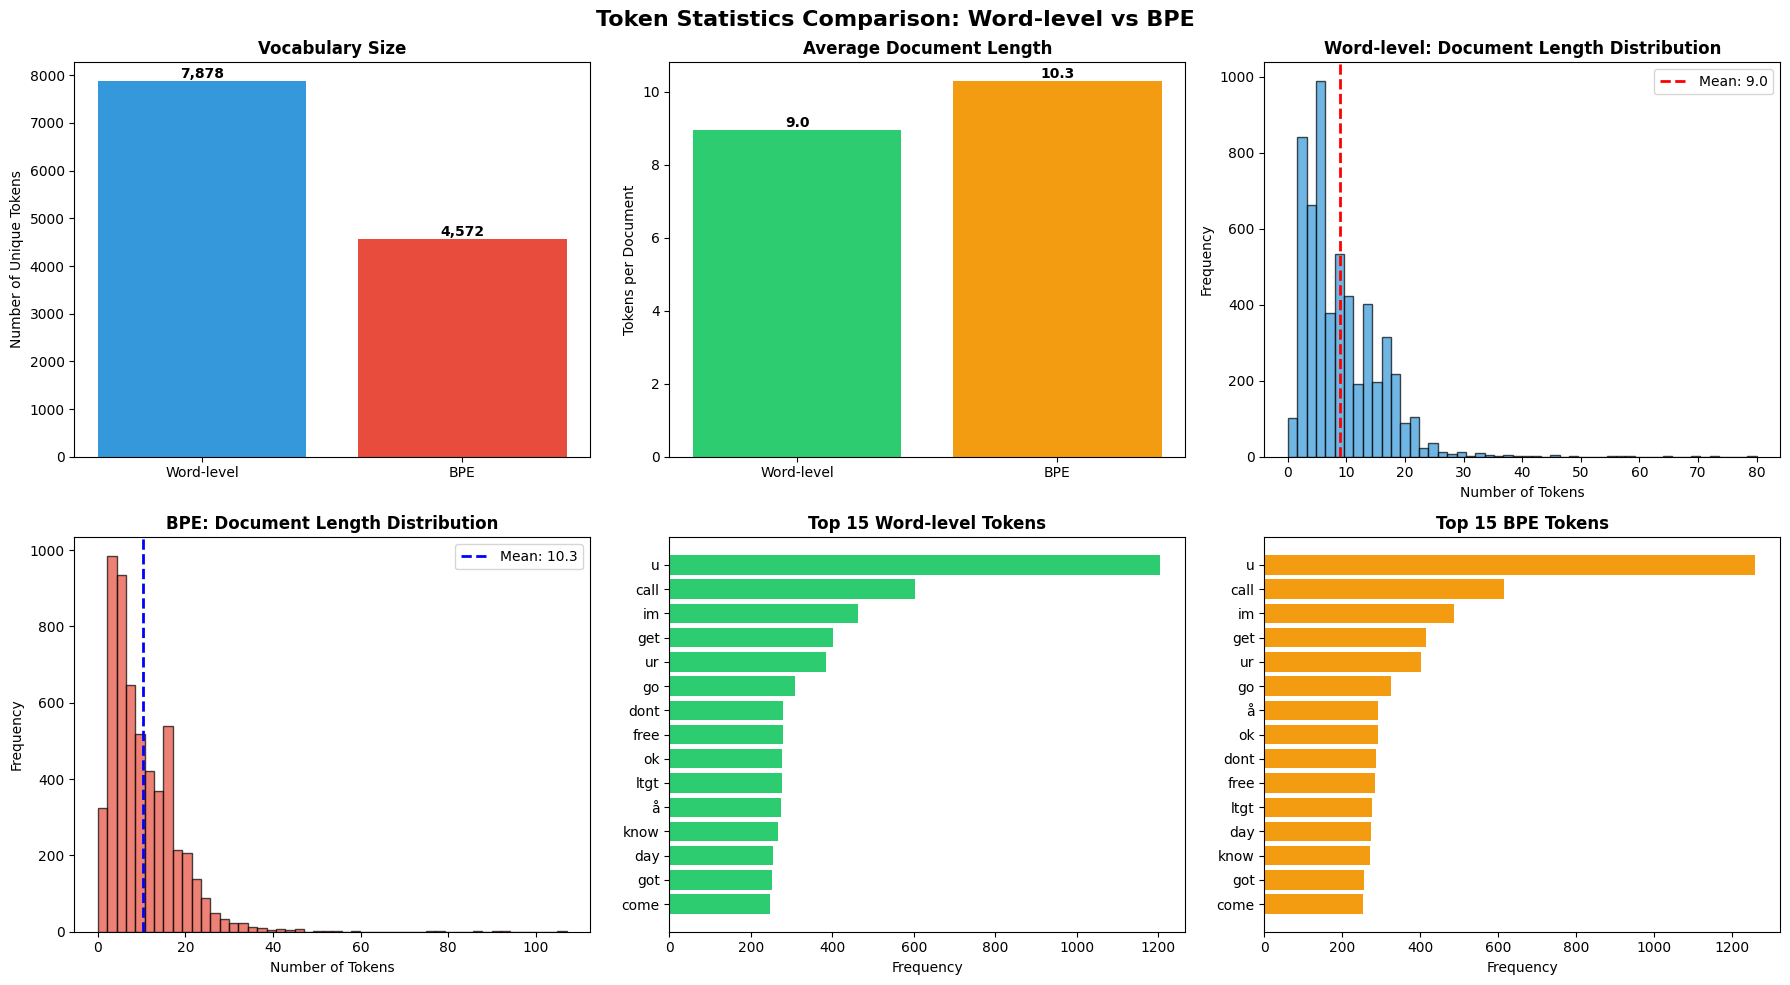

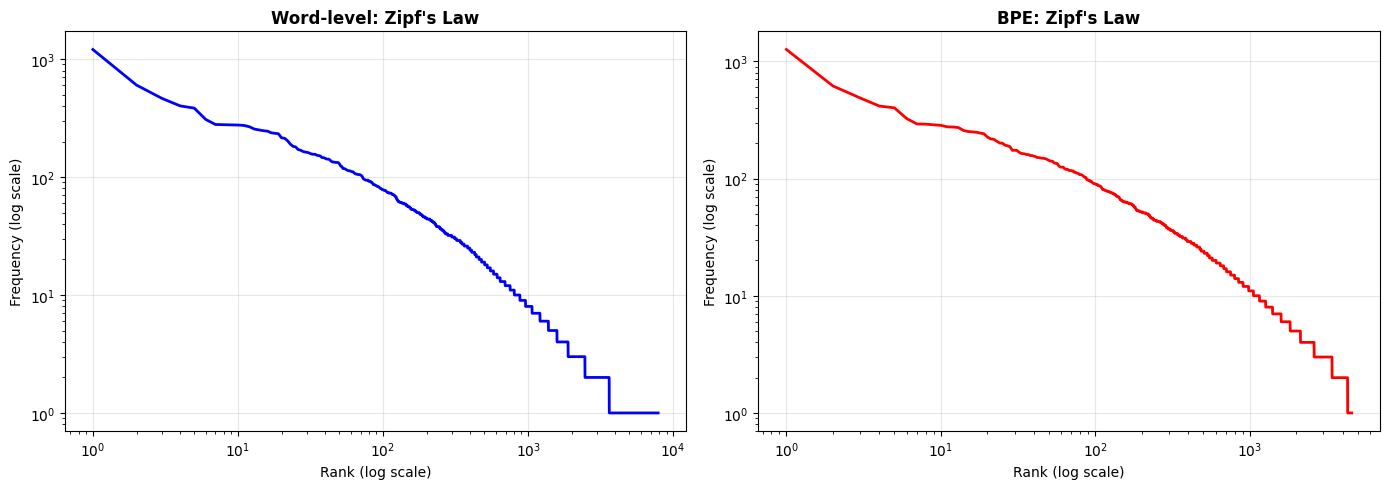

✅ Visualizations complete!


In [70]:
import matplotlib.pyplot as plt

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Token Statistics Comparison: Word-level vs BPE', fontsize=16, fontweight='bold')

# 1. Vocabulary Size Comparison
ax1 = axes[0, 0]
methods = ['Word-level', 'BPE']
vocab_sizes = [word_stats['vocabulary_size'], bpe_stats['vocabulary_size']]
bars1 = ax1.bar(methods, vocab_sizes, color=['#3498db', '#e74c3c'])
ax1.set_title('Vocabulary Size', fontweight='bold')
ax1.set_ylabel('Number of Unique Tokens')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# 2. Average Document Length
ax2 = axes[0, 1]
avg_lengths = [word_stats['avg_doc_length'], bpe_stats['avg_doc_length']]
bars2 = ax2.bar(methods, avg_lengths, color=['#2ecc71', '#f39c12'])
ax2.set_title('Average Document Length', fontweight='bold')
ax2.set_ylabel('Tokens per Document')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Document Length Distribution (Word-level)
ax3 = axes[0, 2]
ax3.hist(word_stats['doc_lengths'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax3.set_title('Word-level: Document Length Distribution', fontweight='bold')
ax3.set_xlabel('Number of Tokens')
ax3.set_ylabel('Frequency')
ax3.axvline(word_stats['avg_doc_length'], color='red', linestyle='--',
            linewidth=2, label=f'Mean: {word_stats["avg_doc_length"]:.1f}')
ax3.legend()

# 4. Document Length Distribution (BPE)
ax4 = axes[1, 0]
ax4.hist(bpe_stats['doc_lengths'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
ax4.set_title('BPE: Document Length Distribution', fontweight='bold')
ax4.set_xlabel('Number of Tokens')
ax4.set_ylabel('Frequency')
ax4.axvline(bpe_stats['avg_doc_length'], color='blue', linestyle='--',
            linewidth=2, label=f'Mean: {bpe_stats["avg_doc_length"]:.1f}')
ax4.legend()

# 5. Top 15 Word Tokens Frequency
ax5 = axes[1, 1]
top_words = word_stats['most_common_tokens'][:15]
words, counts = zip(*top_words)
ax5.barh(range(len(words)), counts, color='#2ecc71')
ax5.set_yticks(range(len(words)))
ax5.set_yticklabels(words)
ax5.set_title('Top 15 Word-level Tokens', fontweight='bold')
ax5.set_xlabel('Frequency')
ax5.invert_yaxis()

# 6. Top 15 BPE Tokens Frequency
ax6 = axes[1, 2]
top_bpe = bpe_stats['most_common_tokens'][:15]
bpe_tokens, bpe_counts = zip(*top_bpe)
ax6.barh(range(len(bpe_tokens)), bpe_counts, color='#f39c12')
ax6.set_yticks(range(len(bpe_tokens)))
ax6.set_yticklabels(bpe_tokens)
ax6.set_title('Top 15 BPE Tokens', fontweight='bold')
ax6.set_xlabel('Frequency')
ax6.invert_yaxis()

plt.tight_layout()
plt.show()

# Additional: Token frequency distribution (Zipf's Law)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Word-level Zipf
word_freqs = sorted([count for _, count in word_freq.items()], reverse=True)
ax1.loglog(range(1, len(word_freqs)+1), word_freqs, 'b-', linewidth=2)
ax1.set_title("Word-level: Zipf's Law", fontweight='bold')
ax1.set_xlabel('Rank (log scale)')
ax1.set_ylabel('Frequency (log scale)')
ax1.grid(True, alpha=0.3)

# BPE Zipf
bpe_freqs = sorted([count for _, count in bpe_freq.items()], reverse=True)
ax2.loglog(range(1, len(bpe_freqs)+1), bpe_freqs, 'r-', linewidth=2)
ax2.set_title("BPE: Zipf's Law", fontweight='bold')
ax2.set_xlabel('Rank (log scale)')
ax2.set_ylabel('Frequency (log scale)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizations complete!")

Bi-gram LM Setup and Training

In [71]:
from collections import Counter, defaultdict
import math
import random


tokenized_texts = df['bpe_tokens'].tolist()


START_TOKEN = "<s>"
END_TOKEN = "</s>"

def add_boundaries(token_lists):
    bounded = []
    for tokens in token_lists:
        if not tokens:
            continue
        bounded.append([START_TOKEN] + tokens + [END_TOKEN])
    return bounded

bounded_texts = add_boundaries(tokenized_texts)

# ------------------------------------------------------------
# 3) Train Bigram counts + unigram context counts
# ------------------------------------------------------------
unigram_counts = Counter()
bigram_counts = Counter()
vocab = set()

for tokens in bounded_texts:
    vocab.update(tokens)
    unigram_counts.update(tokens)
    for i in range(len(tokens) - 1):
        bigram_counts[(tokens[i], tokens[i+1])] += 1

vocab = sorted(vocab)
V = len(vocab)

print("Training complete.")
print("Vocab size:", V)
print("Total unigrams:", sum(unigram_counts.values()))
print("Total bigrams:", sum(bigram_counts.values()))

Training complete.
Vocab size: 4574
Total unigrams: 68440
Total bigrams: 62874


Probability function with Laplace smoothing

In [72]:
def bigram_prob(prev_word, next_word, k=1.0):
    """
    Laplace (add-k) smoothed bigram probability:
    P(next | prev) = (count(prev,next) + k) / (count(prev) + k*|V|)
    """
    prev_count = unigram_counts.get(prev_word, 0)
    pair_count = bigram_counts.get((prev_word, next_word), 0)
    return (pair_count + k) / (prev_count + k * V)


Top-k next-word prediction

In [73]:
def predict_next_words(context, top_k=5, k_smooth=1.0, exclude_tokens=None):
    """
    Predict top_k next words given context.
    For bigram LM, context uses ONLY the last token.
    """
    if exclude_tokens is None:
        exclude_tokens = set()

    # Context can be a string sentence or a list of tokens
    if isinstance(context, str):
        ctx_tokens = context.strip().split()
    else:
        ctx_tokens = list(context)

    prev = ctx_tokens[-1] if len(ctx_tokens) > 0 else START_TOKEN

    candidates = []
    for w in vocab:
        if w in exclude_tokens:
            continue
        p = bigram_prob(prev, w, k=k_smooth)
        candidates.append((w, p))

    candidates.sort(key=lambda x: x[1], reverse=True)
    return candidates[:top_k]


Trying out some prompt

In [74]:
test_prompts = [
    "free",
    "call",
    "urgent",
    "you",
    "i"
]

for prompt in test_prompts:
    preds = predict_next_words(prompt, top_k=8, k_smooth=1.0, exclude_tokens={START_TOKEN})
    print(f"\nContext: '{prompt}'")
    for w, p in preds:
        print(f"  {w:>12s}  p={p:.6f}")



Context: 'free'
          call  p=0.004323
          </s>  p=0.004117
          text  p=0.004117
         entry  p=0.003705
            st  p=0.002264
     camcorder  p=0.001853
           msg  p=0.001853
       auction  p=0.001235

Context: 'call'
          </s>  p=0.016378
         later  p=0.010212
      landline  p=0.005010
         claim  p=0.003661
          land  p=0.003661
    identifier  p=0.003276
     mobileupd  p=0.003276
      customer  p=0.003083

Context: 'urgent'
        mobile  p=0.004094
        trying  p=0.002586
        please  p=0.001724
          call  p=0.001293
       message  p=0.001293
            nd  p=0.001077
            ur  p=0.000862
          </s>  p=0.000646

Context: 'you'
          couk  p=0.000651
          much  p=0.000651
          need  p=0.000651
            ng  p=0.000651
          </s>  p=0.000434
           any  p=0.000434
        carlos  p=0.000434
        chosen  p=0.000434

Context: 'i'
          </s>  p=0.000643
        always  p=0.000643

Logistic Regression and Text Classification

Loading data and basic setup

In [75]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (adjust path if needed)
df = pd.read_csv(file_path, encoding="latin-1")

# Keep only relevant columns, rename for clarity
df = df[["v1", "v2"]].rename(columns={"v1": "label", "v2": "text"})
df["label"] = df["label"].map({"ham": 0, "spam": 1})

df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Train test split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["label"],
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))
print("Spam rate train:", y_train.mean().round(3))
print("Spam rate test:", y_test.mean().round(3))


Train size: 4457
Test size: 1115
Spam rate train: 0.134
Spam rate test: 0.134


TF-IDF vectorization

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1, 2),   # unigrams + bigrams is a strong baseline
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((4457, 7411), (1115, 7411))

Train Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report (spam=1):\n")
print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))


Accuracy: 0.9847533632286996

Classification Report (spam=1):

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.96      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



Confusion matrix

In [79]:
cm = confusion_matrix(y_test, y_pred)
import pandas as pd
pd.DataFrame(cm, index=["Actual ham","Actual spam"], columns=["Pred ham","Pred spam"])


,Pred ham,Pred spam
Actual ham,960,6
Actual spam,11,138


Showing most important features

In [80]:
feature_names = np.array(tfidf.get_feature_names_out())
coefs = clf.coef_.ravel()

top_spam = feature_names[np.argsort(coefs)[-20:]][::-1]
top_ham = feature_names[np.argsort(coefs)[:20]]

print("Top spam-indicative features:\n", top_spam)
print("\nTop ham-indicative features:\n", top_ham)


Top spam-indicative features:
 ['txt' 'uk' 'mobile' 'claim' 'free' 'www' 'reply' '150p' 'service' 'text'
 'stop' '50' 'won' 'new' 'com' 'prize' 'sms' 'urgent' 'win' 'chat']

Top ham-indicative features:
 ['ok' 'll' 'home' 'gt' 'da' 'lt' 'got' 'come' 'lor' 'sorry' 'hey' 'lt gt'
 'later' 'way' 'good' 'going' 'lol' 'yeah' 'oh' 'doing']


Word Embedding - Training Word2Vec embeddings

In [81]:

from gensim.models import Word2Vec
import pandas as pd
from sklearn.model_selection import train_test_split
from tokenizers import Tokenizer

# Assuming df is already defined from previous cells (reloaded for Logistic Regression)
# It currently has 'label' and 'text' columns.

# --- Re-apply preprocessing to get 'processed_message' ---
# The preprocess_text function is defined in cell f03a7482
# (Make sure cell f03a7482 has been executed to define preprocess_text)
df['processed_message'] = df['text'].apply(preprocess_text)

# --- Load the trained BPE tokenizer and apply it to get 'bpe_tokens' ---
# The tokenizer was trained and saved in cell 66e2a9f8
try:
    tokenizer = Tokenizer.from_file("bpe_tokenizer.json")
except Exception as e:
    print(f"Error loading tokenizer: {e}. Please ensure 'bpe_tokenizer.json' exists and cell 66e2a9f8 was run.")
    # Fallback or re-train if necessary, for now just re-raise or exit.
    raise

df['bpe_tokens'] = df['processed_message'].apply(lambda x: tokenizer.encode(x).tokens)

# Now, 'df' should have the 'bpe_tokens' column

# We need to split the 'bpe_tokens' column in the same way 'text' was split for training
X_train_bpe_tokens, X_test_bpe_tokens, _, _ = train_test_split(
    df['bpe_tokens'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

w2v = Word2Vec(
    sentences=X_train_bpe_tokens,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1,        # 1 = skip-gram (often better on small-ish corpora)
    epochs=10
)

print("Vocab size in Word2Vec:", len(w2v.wv.index_to_key))

Vocab size in Word2Vec: 3877


Converting each message to an average embedding

In [82]:
import numpy as np

def avg_w2v_vector(tokens, model, vector_size):
    vecs = []
    for w in tokens:
        if w in model.wv:
            vecs.append(model.wv[w])
    if len(vecs) == 0:
        return np.zeros(vector_size, dtype=np.float32)
    return np.mean(vecs, axis=0)

X_train_emb = np.vstack([avg_w2v_vector(toks, w2v, 100) for toks in X_train_bpe_tokens])
X_test_emb = np.vstack([avg_w2v_vector(toks, w2v, 100) for toks in X_test_bpe_tokens])

X_train_emb.shape, X_test_emb.shape

((4457, 100), (1115, 100))

Logistic Regression on embeddings

In [83]:
from sklearn.linear_model import LogisticRegression

clf_emb = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
clf_emb.fit(X_train_emb, y_train)

y_pred_emb = clf_emb.predict(X_test_emb)

print("Word2Vec Accuracy:", accuracy_score(y_test, y_pred_emb))
print("\nWord2Vec Classification Report:\n")
print(classification_report(y_test, y_pred_emb, target_names=["ham", "spam"]))

Word2Vec Accuracy: 0.9479820627802691

Word2Vec Classification Report:

              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       966
        spam       0.76      0.89      0.82       149

    accuracy                           0.95      1115
   macro avg       0.87      0.92      0.90      1115
weighted avg       0.95      0.95      0.95      1115



Comparing TF-IDF vs Embeddings in one table

In [84]:
from sklearn.metrics import precision_recall_fscore_support

def get_metrics(y_true, y_hat):
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_hat, average="binary")
    acc = accuracy_score(y_true, y_hat)
    return acc, p, r, f1

tfidf_metrics = get_metrics(y_test, y_pred)         # y_pred from TF-IDF section
emb_metrics = get_metrics(y_test, y_pred_emb)       # y_pred_emb from Word2Vec section

comparison = pd.DataFrame(
    [tfidf_metrics, emb_metrics],
    columns=["Accuracy", "Precision", "Recall", "F1"],
    index=["TF-IDF + LogisticRegression", "Word2Vec(avg) + LogisticRegression"]
)

comparison

,Accuracy,Precision,Recall,F1
TF-IDF + LogisticRegression,0.984753,0.958333,0.926174,0.941980
Word2Vec(avg) + LogisticRegression,0.947982,0.760000,0.892617,0.820988
